In [1]:
!pip install -U ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12986 sha256=ceb303d6ab389b7489df6c50c779b5a2610cfec89dec6159e099842e0aee51ea
  Stored in directory: /root/.cache/pip/wheels/d0/1f/c4/e619fb20c9b10df8ddde15d583197edef8c2f27d7b1f29c633
Successfully built ppscore
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

In [3]:
data = pd.read_csv('../input/ipldata/matches.csv')
top_5_teams = ['Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Kings XI Punjab']
df = data[['season','winner']].copy().dropna()
df['win_count'] = df.groupby(['season','winner'])['winner'].transform('count')
perc = df.loc[:,["season","winner",'win_count']]
perc = perc.drop_duplicates()
perc = perc.loc[perc['winner'].isin(top_5_teams)]
perc = perc.sort_values("season")
fig=px.bar(perc,x='winner', y="win_count", animation_frame="season", 
           animation_group="winner", color="winner", hover_name="winner")
fig.update_layout(title='Wins by top teams per year', showlegend=False)
fig.show()

In [4]:
data = pd.read_csv('../input/ipldata/deliveries.csv')
match = pd.read_csv('../input/ipldata/matches.csv')

# Content

<ul style='font-size:18px'>
    <li>Facts on IPL</li>
    <li>Description of Data</li>
    <li>Correlation in Data</li>
    <li>Interesting statistics related to bowlers</li>
    <li>Interesting statistics related to batsmen</li>
    <li>Interesting statistics related to fielders</li>
    <li>Interesting statistics related to teams</li>
</ul>

<img src="https://cdn.dnaindia.com/sites/default/files/styles/full/public/2020/08/07/917968-ipl.jpg" height="800" width="700">

# Facts on IPL

<ol style='font-size:18px'>
    <li>Broadcasting rights of IPL 2018 are sold for a whopping ₹16347.5 crore to Star India Network. It means 1 ball costs around 21 Lakh Rupees.</li>
    <li>In IPL, Delhi Daredevils is the only team that had never played an IPL Final.</li>
    <li>Praveen Kumar had bowled the highest number of dot balls in the history of IPL. He has bowled 1075 dot balls in 119 Matches.</li>
    <li>Chennai Super Kings is the only team in IPL that has never changed its captain.</li>
    <li>Amit Mishra holds the record of highest number of hat-tricks (3) in the history of IPL.</li>
    <li>K.L. Rahul holds the record of fastest 50 (in 14 balls) and Chris Gayle holds the record of fastest 100 (in 30 balls) in IPL.</li>
</ol>

<p style='font-size:18px'>There are mainly two datasets. One mentioning each of the ball by ball delivery of 2019.<br><br> While the other one contains statistics of all the matches played the year 2019.<br><br>I will be considering the deliveries data to be the main data of concern and then move on to the match statictics data.</p>

# Description of Data

In [5]:
fig = data.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Unique Value Count Plot', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

In [6]:
fig = data.isnull().sum().reset_index().plot(kind='bar', x='index', y=0)
fig.update_layout(title='Missing Value Plot', xaxis_title='Variables', yaxis_title='Missing value count')
fig.show()

The dataset almost seems missing value free and is perfect for telling stories. For now I will ignore the variable containing missing values.

# Ways of dismissal 

In [7]:
df = data['dismissal_kind'].value_counts().reset_index()
df.columns = ['Dismissal Kind', 'Count']
fig = px.pie(df, values='Count', names='Dismissal Kind',title='Most common ways of dismissal in IPL 2019')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Correlation in Data

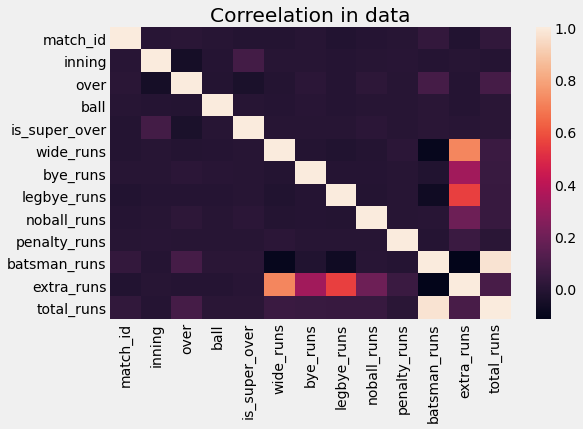

In [8]:
sns.heatmap(data.corr())
plt.title('Correelation in data')
plt.show()

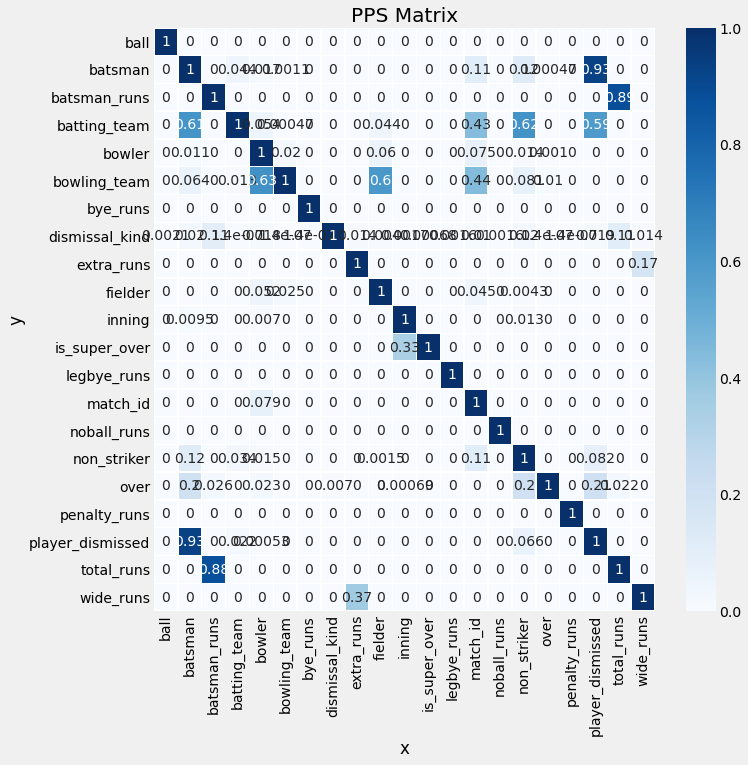

In [9]:
matrix_df = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(10,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('PPS Matrix')
plt.show()

# Interesting statistics related to bowlers

In [10]:
df = data.loc[data['is_super_over']==1, ['bowler','is_super_over']].copy()
df['total_balls'] = df.groupby('bowler')['is_super_over'].transform('count')
df = df.drop('is_super_over',axis=1).drop_duplicates().reset_index(drop=True).sort_values('total_balls', ascending=False).head(15)
fig = df.plot(kind='bar', x='bowler', y='total_balls', color='total_balls')
fig.update_layout(title='Bowlers who bowled most balls in super overs')
fig.show()

In [11]:
df = data[['bowler', 'total_runs']].copy()
df['ball_count'] = df.groupby('bowler')['total_runs'].transform('count')
df['total_runs'] = df.groupby('bowler')['total_runs'].transform('sum')
df['runs_per_ball'] = df['total_runs'] / df['ball_count']
df = df.drop_duplicates().reset_index(drop=True).sort_values('runs_per_ball').head(15)
fig = df.plot(kind='bar', y='bowler', x='runs_per_ball', color='runs_per_ball')
fig.update_layout(title='Bowlers with best economy')
fig.show()

AC Gilchrist is probably the only bowler who gave no run at all.

The reason is quite clear. Because he bowled only one over throughout the whole IPL season.

In [12]:
df = data[['bowler', 'total_runs']].copy()
df['ball_count'] = df.groupby('bowler')['total_runs'].transform('count')
df['total_runs'] = df.groupby('bowler')['total_runs'].transform('sum')
df['runs_per_ball'] = df['total_runs'] / df['ball_count']
df = df.drop_duplicates().reset_index(drop=True).sort_values('runs_per_ball',ascending=False).head(15)
fig = df.plot(kind='bar', y='bowler', x='runs_per_ball', color='runs_per_ball')
fig.update_layout(title='Bowlers with worst economy')
fig.show()

In [13]:
df = data.loc[data['wide_runs']>0, ['bowler', 'wide_runs']].copy()
df['total_wides'] = df.groupby('bowler')['wide_runs'].transform('count')
df = df.drop('wide_runs', axis=1).drop_duplicates().reset_index(drop=True).sort_values('total_wides',ascending=False).head(15)
fig = df.plot(kind='bar', x='bowler', y='total_wides', color='total_wides')
fig.update_layout(title='Bowlers with most wide balls')
fig.show()

# Interesting statictics related to batsmen

In [14]:
df = data[['batsman', 'total_runs']].copy()
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df = df.drop_duplicates().sort_values('total_runs').tail(15).reset_index(drop=True)
fig = df.plot(kind='bar', x='batsman', y='total_runs', color='total_runs')
fig.update_layout(title='Highest runs by batsman')
fig.show()

In [15]:
df = data[['batsman', 'total_runs']].copy()
df['ball_count'] = df.groupby('batsman')['total_runs'].transform('count')
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df['Strike Rate'] = (df['total_runs'] / df['ball_count']) * 100
df = df.drop_duplicates().sort_values('Strike Rate').tail(15).reset_index(drop=True)
fig = df.plot(kind='bar', y='batsman', x='Strike Rate', color='Strike Rate')
fig.update_layout(title='Batsmen with best strike rate')
fig.show()

In [16]:
df = data[['batsman', 'total_runs']].copy()
df['ball_count'] = df.groupby('batsman')['total_runs'].transform('count')
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df['Strike Rate'] = (df['total_runs'] / df['ball_count']) * 100
df = df[df['Strike Rate']>0].drop_duplicates().sort_values('Strike Rate').head(15).reset_index(drop=True)
fig = df.plot(kind='bar', y='batsman', x='Strike Rate', color='Strike Rate')
fig.update_layout(title='Batsmen with worst strike rate')
fig.show()

In [17]:
df = data.loc[data['is_super_over']==1, ['batsman','total_runs']].copy()
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df = df.drop_duplicates().sort_values('total_runs', ascending=False).head(15).reset_index(drop=True)
fig = df.plot(kind='bar', x='batsman', y='total_runs', color='total_runs')
fig.update_layout(title='Batsman who scored most runs in super overs')
fig.show()

# Interesting statistics related to fielders

In [18]:
df = data[['dismissal_kind','fielder']].copy()
df = df.dropna()
df['dismiss_count'] = df.groupby(['dismissal_kind','fielder'])['fielder'].transform('count')
df = df[df['dismissal_kind'].isin(['caught', 'run out'])]
df = df.drop_duplicates()
df1 = df[df['dismissal_kind']=='caught'].sort_values('dismiss_count').tail(10)
df2 = df[df['fielder'].isin(df1['fielder'].tolist())]
df2 = df2[df2['dismissal_kind']=='run out'].sort_values('dismiss_count').tail(10)
df = pd.concat([df1,df2],axis=0)
df = df.reset_index(drop=True)
fig = df.plot(kind='bar', x='fielder', y='dismiss_count', color='dismissal_kind')
fig.update_layout(title='Best performing fielders')
fig.show()

In [19]:
df = data[['bowling_team','dismissal_kind','fielder']].copy()
df = df.dropna()
df = df[df['dismissal_kind']=='stumped']
df['stump_count'] = df.groupby(['bowling_team','fielder'])['dismissal_kind'].transform('count')
df = df.drop('dismissal_kind', axis=1).drop_duplicates().sort_values('stump_count').tail(20).reset_index(drop=True)
fig = df.plot(kind='bar', x='fielder', y='stump_count', color='bowling_team')
fig.update_layout(title='Best Stumpers and their teams')
fig.show()

<p style='font-size:18px'>I think that's all the data that could have been extracted from the per ball dataset.<br><br>Next I will move on to the dataset that contains statistics of each match.</p>

# Interesting statistics related to teams

In [20]:
data = match.copy()
df = data[['city','winner']].copy().dropna()
df['win_count'] = df.groupby(['city','winner'])['winner'].transform('count')
df = df.drop_duplicates().sort_values('win_count').tail(40)
fig = df.plot(kind='bar', x='winner', y='win_count', color='city')
fig.update_layout(title='Teams with most wins and the cities')
fig.show()

In [21]:
df = data[['toss_winner', 'toss_decision']].copy()
df['count'] = df.groupby(['toss_winner', 'toss_decision'])['toss_decision'].transform('count')
df = df.drop_duplicates().reset_index(drop=True)
fig = df.plot(kind='bar', x='toss_winner', y='count', color='toss_decision', barmode='group')
fig.update_layout(title='Toss wins and decisions')
fig.show()

In [22]:
top_players = data['player_of_match'].value_counts().reset_index()['index'].tolist()[:7]
df = data[['winner','player_of_match']].dropna()
df['POM_count'] = df.groupby(['winner','player_of_match'])['player_of_match'].transform('count')
df = df.drop_duplicates().reset_index(drop=True).sort_values('POM_count')
df = df[df['player_of_match'].isin(top_players)]
fig = df.plot(kind='bar', x='player_of_match', y='POM_count', color='winner')
fig.update_layout(title='Players with most Player of the match titles and their teams')
fig.show()

In [23]:
df = data['result'].value_counts().reset_index()
df.columns = ['result', 'count']
fig = px.pie(df, values='count', names='result',title='Most common results')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<p style='font-size:18px'>I will be ending the work for this notebook here. Probably all the information that could be extracted from these two datasets is already taken out.<br><br>Leave an upvote if you like this notebook.</p>